In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Wstępny opis danych

Jako przykładowe dane posłużą `fake_euphoria`.

In [202]:
fake_euphoria = pd.read_csv('fake_euphoria_sam.csv')
fake_euphoria = fake_euphoria.iloc[:, 1:]
fake_euphoria.head()

,sensorId,cycle_id,cycle_step_id,resistancy_of_sensor,temperature,pressure,relative_humidity
0,1,844,0,5.565218e+06,33.774986,1002.140198,42.953712
1,1,844,1,1.890607e+06,32.950565,1002.113159,43.547504
2,1,844,2,2.070779e+05,33.232075,1002.107727,43.648933
3,1,844,3,1.477207e+05,33.827766,1002.115356,43.819725
4,1,844,4,1.233735e+05,33.930824,1002.121155,43.624691


In [209]:
fake_euphoria.shape
fake_euphoria['cycle_id'].unique

<bound method Series.unique of 0        844
1        844
2        844
3        844
4        844
        ... 
5745    1407
5746    1407
5747    1407
5748    1407
5749    1407
Name: cycle_id, Length: 5750, dtype: int64>

Dane te posiadają 5750 obserwacji oraz 7 cech: `sensorId` - ID sensora (od 0 do 9 - 10 sensorów), `cycle_id` - ID cyklu pracy (?) (tu liczby od 844 do 1407), `cycle_step_id` - ID kroku cyklu (od 0 do 9 - łącznie 10), `resistanty_of_sensor` - wartość rezystancji sensora (w Ohmach), `temperature` - temperatura sensora (w st. Celsiusza), `pressure` - ciśnienie odczytane przez sensor (w hPa) oraz `relative_humidity` - wilgotność (w %).

In [204]:
features = fake_euphoria.iloc[:, 3:]
features.head()

,resistancy_of_sensor,temperature,pressure,relative_humidity
0,5.565218e+06,33.774986,1002.140198,42.953712
1,1.890607e+06,32.950565,1002.113159,43.547504
2,2.070779e+05,33.232075,1002.107727,43.648933
3,1.477207e+05,33.827766,1002.115356,43.819725
4,1.233735e+05,33.930824,1002.121155,43.624691


In [210]:
features.describe()

,resistancy_of_sensor,temperature,pressure,relative_humidity
count,5.750000e+03,5750.000000,5750.000000,5750.000000
mean,5.813096e+05,41.237893,1002.365306,33.785924
std,1.619313e+06,2.176158,0.159401,3.154673
min,1.111883e+04,32.950565,1002.007141,29.047253
25%,4.884331e+04,40.335599,1002.272705,31.515873
50%,8.885804e+04,41.828987,1002.354218,32.823687
75%,1.246121e+05,42.784771,1002.436661,35.297409
max,9.890733e+06,44.536156,1002.801697,44.285744


Na podstawie powyższych statystyk opisowych czterech zmiennych zebranych przez "elektroniczny nos", dostrzec można, że sprzęt ten nagrzewał się podczas badania - od temteratury 32 st. C przeszedł do 44 st. C. Ciśnienie zmierzone przez ten sprzęt pozostawało na stałym poziomie. Wilgotność, podobnie jak i temperatura, ulegała zmianie podczas badania.
Docelowa cecha w tym badaniu to rezystancja.

In [151]:
# obrobienie przykladowej obserwacji dla jednego kanalu
fake_euphoria = pd.read_csv('fake_euphoria_sam.csv')
fake_euphoria = fake_euphoria.iloc[:, 1:]

n = 96 # stala liczba probek

y = np.zeros((4, 10, 96))

for sensorId, df_sensor in fake_euphoria.groupby('sensorId'):
    x = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4,96)
    
        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x[:, cyclestepId, :] = features[:n]

    y[:, :, :] = x


In [152]:
y.shape, x.shape
# (4, 10, 96) -> (n_features, n_cyclesteps, n_samples)

((4, 10, 96), (4, 10, 96))

Dane przekształcone zostały na tensory o wymiarze (4,10,96), gdzie 4 to liczba cech zmierzonych przez sensor, 10 to liczba kroków pojedynczego cyklu pracy urządzenia, a 96 to stała liczba próbek.

In [213]:
y[:4,0,:96]

array([[12132.701172, 12524.461914, 12673.267578, 12848.825195,
        12872.083984, 12965.963867, 13029.316406, 13117.442383,
        13149.78418 , 13133.59375 , 13190.436523, 13239.552734,
        13473.68457 , 13313.916992, 13297.319336, 13380.723633,
        13363.958984, 13422.818359, 13516.367188, 13550.708984,
        13550.708984, 13611.229492, 13663.535156, 13619.918945,
        13716.245117, 13716.245117, 13831.856445, 13840.830078,
        13796.077148, 13876.842773, 13876.842773, 13903.975586,
        13949.433594, 14096.916016, 13995.189453, 14096.916016,
        14069.026367, 14190.6875  , 14190.6875  , 14219.0625  ,
        14181.253906, 14333.707031, 14295.287109, 14304.873047,
        14352.994141, 14372.333008, 14391.724609, 14430.665039,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     0.      ,     0.      ,
            0.      ,     0.      ,     

Poniżej przedstawiono przebiegi poszczególnych cech dla badanych danych.

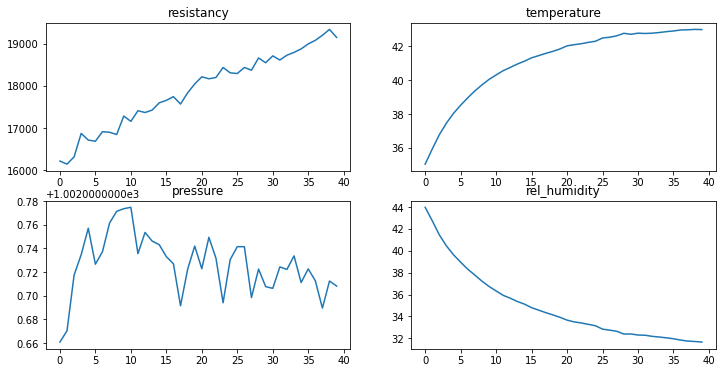

In [91]:
FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x[i, 0, :][:40])
    ax.set_title(FEATURES[i])


Widzimy zaobserwowane przy okazji statystyk opisowych tendencje - zwiększa się temperatura sensora, zmniejsza się jego wilgotność. Zwiekszają się także wartości rezystancji.

Ponizej przedstawiono zmiany 4 badanych cech w porównaniu dla każdego z dziesięciu kroków cyklu.

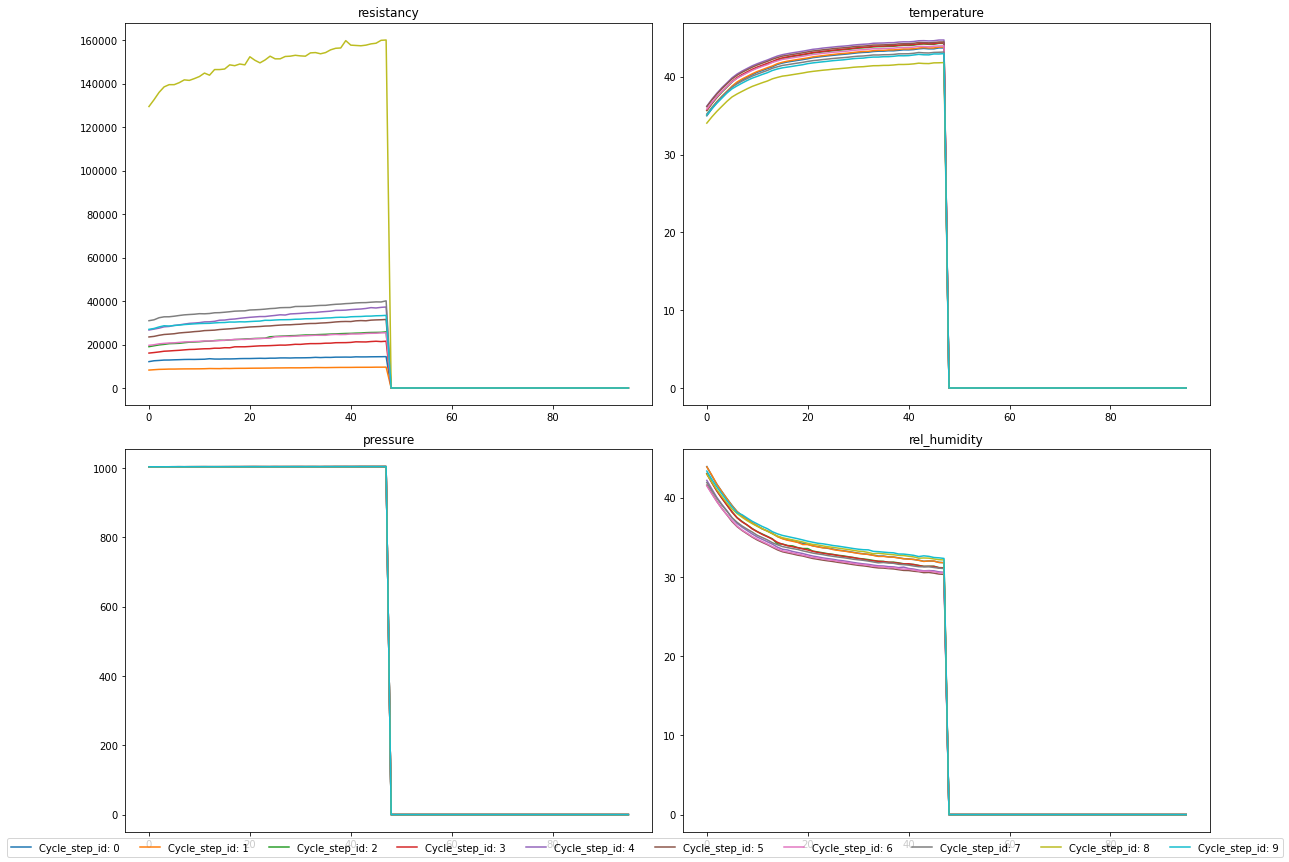

In [215]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for cyclestepId in range(0, 10):
    for i, ax in enumerate(axes):
        ax.plot(y[i, cyclestepId, :96], label=f'Cycle_step_id: {cyclestepId}')
        ax.set_title(FEATURES[i])


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 10, labelspacing = 5)

plt.tight_layout()
plt.show()


Dla kroku cyklu równego 7, poziom rezystancji odbiega od pozostałych. Dla pozostałych cech, ich wartości są do siebie zbliżone dla każdego kroku.

In [96]:
#euphoria
fake_euphoria = pd.read_csv('fake_euphoria_sam.csv')
og_euphoria = pd.read_csv('og_euphoria_sam.csv')

#theone
fake_theone = pd.read_csv('fake_goodgirl_sam.csv')
og_goodgirl = pd.read_csv('og_goodgirl_sam.csv')

#theone
fake_theone = pd.read_csv('fake_theone_sam.csv')
og_theone = pd.read_csv('og_theone_sam.csv')

#ysly
fake_ysly = pd.read_csv('fake_ysly_sam.csv')
og_ysly = pd.read_csv('og_ysly_sam.csv')

#### Wizualizacje porównujące podróbki i oryginały

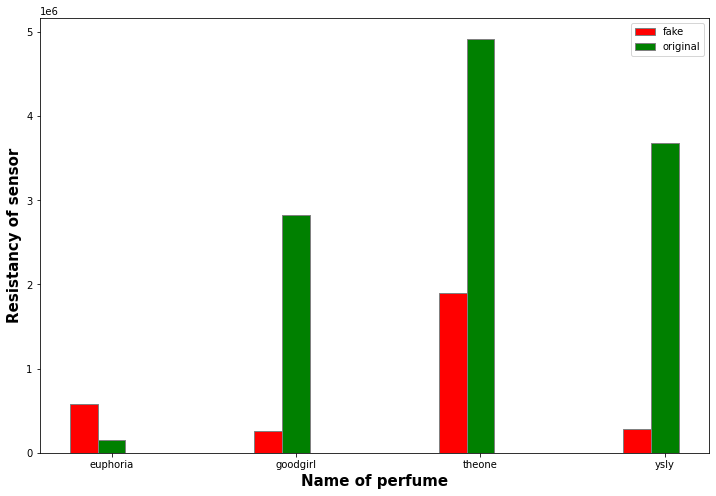

In [122]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
fake = np.array([fake_euphoria['resistancy_of_sensor'].mean(), fake_theone['resistancy_of_sensor'].mean(), fake_theone['resistancy_of_sensor'].mean(), fake_ysly['resistancy_of_sensor'].mean()])
og = np.array([og_euphoria['resistancy_of_sensor'].mean(), og_goodgirl['resistancy_of_sensor'].mean(), og_theone['resistancy_of_sensor'].mean(), og_ysly['resistancy_of_sensor'].mean()])
 
# Set position of bar on X axis 
br1 = np.arange(len(fake)) 
br2 = [x + barWidth for x in br1] 
#br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, fake, color ='r', width = barWidth, 
        edgecolor ='grey', label ='fake') 
plt.bar(br2, og, color ='g', width = barWidth, 
        edgecolor ='grey', label ='original') 
 
# Adding Xticks 
plt.xlabel('Name of perfume', fontweight ='bold', fontsize = 15) 
plt.ylabel('Resistancy of sensor', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(fake))], 
        ['euphoria', 'goodgirl', 'theone', 'ysly'])
 
plt.legend()
plt.show() 

Widzimy, że dla perfumu *euphoria* wartość rezystancji originalnego perfumu jest mniejsza niż dla pozostałych perfum. Jednak dla trzech pozostałych, wartości rezystancji dla oryginałów znacznie przewyższają fałszywe perfumy.

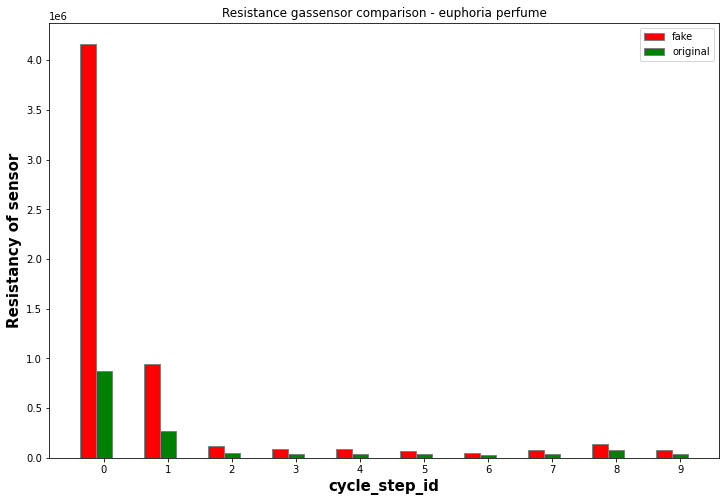

In [138]:
#euphoria - porównanie fake i og

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
fake = np.array([fake_euphoria.loc[fake_euphoria['cycle_step_id']==0].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==1].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==2].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==3].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==4].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==5].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==6].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==7].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==8].iloc[:,4].mean(), fake_euphoria.loc[fake_euphoria['cycle_step_id']==9].iloc[:,4].mean()])
og = np.array([og_euphoria.loc[og_euphoria['cycle_step_id']==0].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==1].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==2].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==3].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==4].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==5].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==6].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==7].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==8].iloc[:,4].mean(), og_euphoria.loc[og_euphoria['cycle_step_id']==9].iloc[:,4].mean()]) 

# Set position of bar on X axis 
br1 = np.arange(len(fake)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, fake, color ='r', width = barWidth, 
        edgecolor ='grey', label ='fake') 
plt.bar(br2, og, color ='g', width = barWidth, 
        edgecolor ='grey', label ='original') 
 
# Adding Xticks 
plt.xlabel('cycle_step_id', fontweight ='bold', fontsize = 15) 
plt.ylabel('Resistancy of sensor', fontweight ='bold', fontsize = 15) 
plt.title('Resistance gassensor comparison - euphoria perfume')
plt.xticks([r + barWidth for r in range(len(fake))], 
        ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
 
plt.legend()
plt.show()

Widzimy tutaj zaobserwowane powyżej wnioski - fałszywy perfum "pachnie mocniej" niż oryginał.

In [128]:
fake_euphoria.loc[fake_euphoria['cycle_step_id']==0].iloc[:,4].mean()

4166012.240200407

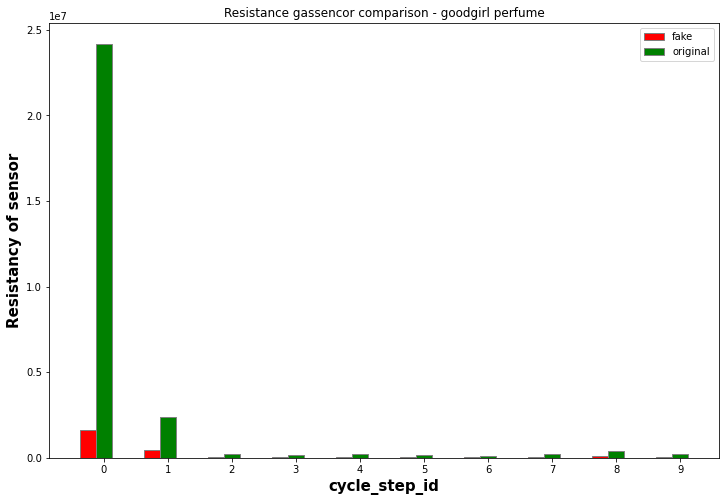

In [139]:
#goodgirl - porównanie fake i og

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
fake = np.array([fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==0].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==1].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==2].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==3].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==4].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==5].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==6].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==7].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==8].iloc[:,4].mean(), fake_goodgirl.loc[fake_goodgirl['cycle_step_id']==9].iloc[:,4].mean()])
og = np.array([og_goodgirl.loc[og_goodgirl['cycle_step_id']==0].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==1].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==2].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==3].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==4].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==5].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==6].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==7].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==8].iloc[:,4].mean(), og_goodgirl.loc[og_goodgirl['cycle_step_id']==9].iloc[:,4].mean()]) 

# Set position of bar on X axis 
br1 = np.arange(len(fake)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, fake, color ='r', width = barWidth, 
        edgecolor ='grey', label ='fake') 
plt.bar(br2, og, color ='g', width = barWidth, 
        edgecolor ='grey', label ='original') 
 
# Adding Xticks 
plt.xlabel('cycle_step_id', fontweight ='bold', fontsize = 15) 
plt.ylabel('Resistancy of sensor', fontweight ='bold', fontsize = 15) 
plt.title('Resistance gassencor comparison - goodgirl perfume')
plt.xticks([r + barWidth for r in range(len(fake))], 
        ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
 
plt.legend()
plt.show()

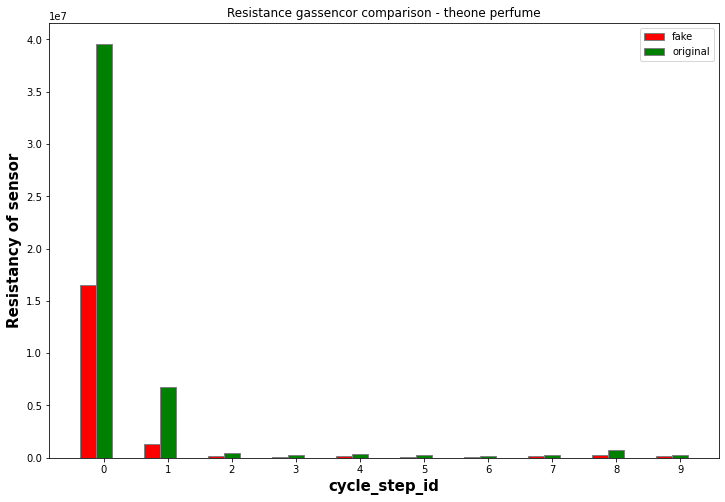

In [135]:
#theone - porównanie fake i og

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
fake = np.array([fake_theone.loc[fake_theone['cycle_step_id']==0].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==1].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==2].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==3].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==4].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==5].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==6].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==7].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==8].iloc[:,4].mean(), fake_theone.loc[fake_theone['cycle_step_id']==9].iloc[:,4].mean()])
og = np.array([og_theone.loc[og_theone['cycle_step_id']==0].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==1].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==2].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==3].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==4].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==5].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==6].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==7].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==8].iloc[:,4].mean(), og_theone.loc[og_theone['cycle_step_id']==9].iloc[:,4].mean()]) 

# Set position of bar on X axis 
br1 = np.arange(len(fake)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, fake, color ='r', width = barWidth, 
        edgecolor ='grey', label ='fake') 
plt.bar(br2, og, color ='g', width = barWidth, 
        edgecolor ='grey', label ='original') 
 
# Adding Xticks 
plt.xlabel('cycle_step_id', fontweight ='bold', fontsize = 15) 
plt.ylabel('Resistancy of sensor', fontweight ='bold', fontsize = 15) 
plt.title('Resistance gassencor comparison - theone perfume')
plt.xticks([r + barWidth for r in range(len(fake))], 
        ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
 
plt.legend()
plt.show()

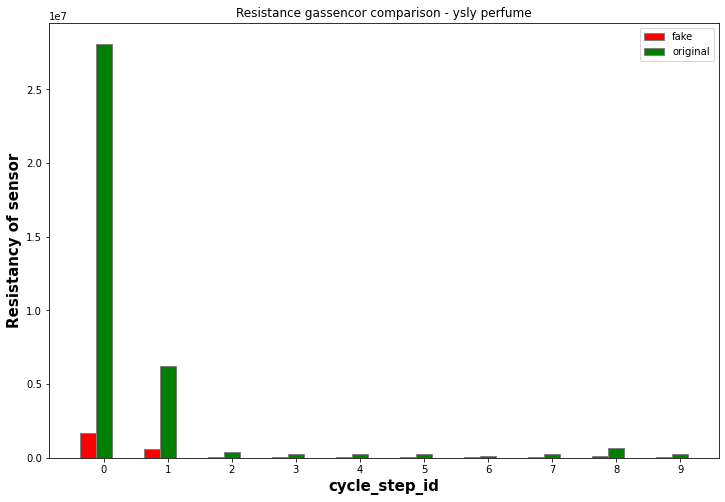

In [134]:
#ysly - porównanie fake i og

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
fake = np.array([fake_ysly.loc[fake_ysly['cycle_step_id']==0].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==1].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==2].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==3].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==4].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==5].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==6].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==7].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==8].iloc[:,4].mean(), fake_ysly.loc[fake_ysly['cycle_step_id']==9].iloc[:,4].mean()])
og = np.array([og_ysly.loc[og_ysly['cycle_step_id']==0].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==1].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==2].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==3].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==4].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==5].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==6].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==7].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==8].iloc[:,4].mean(), og_ysly.loc[og_ysly['cycle_step_id']==9].iloc[:,4].mean()]) 

# Set position of bar on X axis 
br1 = np.arange(len(fake)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, fake, color ='r', width = barWidth, 
        edgecolor ='grey', label ='fake') 
plt.bar(br2, og, color ='g', width = barWidth, 
        edgecolor ='grey', label ='original') 
 
# Adding Xticks 
plt.xlabel('cycle_step_id', fontweight ='bold', fontsize = 15) 
plt.ylabel('Resistancy of sensor', fontweight ='bold', fontsize = 15) 
plt.title('Resistance gassencor comparison - ysly perfume')
plt.xticks([r + barWidth for r in range(len(fake))], 
        ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
 
plt.legend()
plt.show()

Dla trzech pozostałych perfum rezystancja sensora dla oryginalów przewyższa ich podróbki. Ponadto na każdym wykresie zaobserwować można, że pierwszy krok cyklu zbiera większe odczyty tej cechy.

### Porównanie 4 cech dla perfum euphoria

In [155]:
og_euphoria = pd.read_csv('og_euphoria_sam.csv')
og_euphoria = og_euphoria.iloc[:, 1:]

# obrobienie przykladowej obserwacji dla jednego kanalu
import numpy as np

n = 95 # stala liczba probek

y1 = np.zeros((4, 10, 95))

for sensorId, df_sensor in og_euphoria.groupby('sensorId'):
    x1 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4, 95)

        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x1[:, cyclestepId, :] = features[:n]

y1[:, :, :] = x1

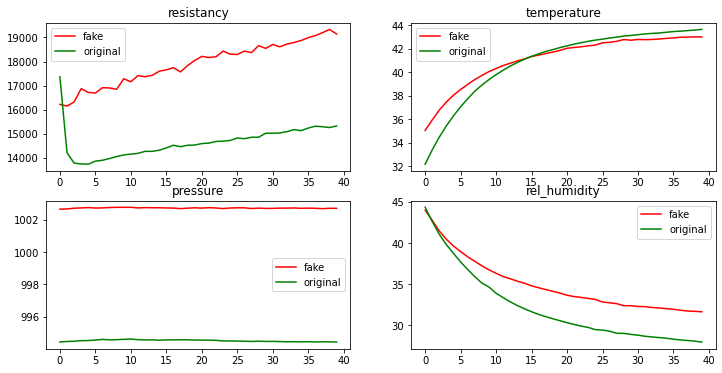

In [169]:
#euphoria - porównanie cech dla fake i og
fake_eup_x = x
fake_eup_y = y

og_eup_x = x1
og_eup_y = y1

import matplotlib.pyplot as plt

FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x[i, 0, :][:40], label='fake', color='red')
    ax.plot(x1[i, 0, :][:40], label='original', color='green')
    ax.set_title(FEATURES[i])
    ax.legend()


#fig.legend(loc='lower center', ncol = 2)

### Porównanie 4 cech dla perfum goodgirl

In [172]:
#goodgirl - porównanie cech dla fake i og
# obrobienie przykladowej obserwacji dla jednego kanalu
import numpy as np

fake_goodgirl = pd.read_csv('fake_goodgirl_sam.csv')
fake_goodgirl = fake_goodgirl.iloc[:, 1:]

n = 96 # stala liczba probek

y2 = np.zeros((4, 10, 96))

for sensorId, df_sensor in fake_goodgirl.groupby('sensorId'):
    x2 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4,96)
    
        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x2[:, cyclestepId, :] = features[:n]

    y2[:, :, :] = x2

In [177]:
y2.shape, x2.shape
fake_good_x = x2
fake_good_y = y2

In [178]:
# obrobienie przykladowej obserwacji dla jednego kanalu
import numpy as np


n = 95 # stala liczba probek

og_goodgirl = pd.read_csv('og_goodgirl_sam.csv')
og_goodgirl = og_goodgirl.iloc[:, 1:]

y3 = np.zeros((4, 10, 95))

for sensorId, df_sensor in og_goodgirl.groupby('sensorId'):
    x3 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4, 95)

        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x3[:, cyclestepId, :] = features[:n]

y3[:, :, :] = x3

In [179]:
x.shape, y.shape
og_good_x = x3
og_good_y = y3

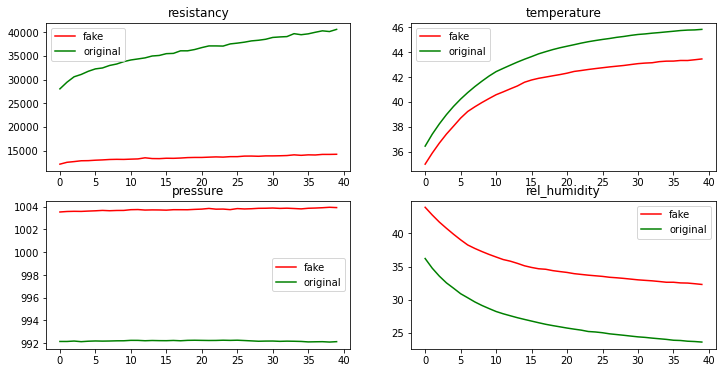

In [182]:
import matplotlib.pyplot as plt

FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x2[i, 0, :][:40], label='fake', color='red')
    ax.plot(x3[i, 0, :][:40], label='original', color='green')
    ax.set_title(FEATURES[i])
    ax.legend()


### Porównanie 4 cech dla perfum theone

In [184]:
#theone - porównanie cech dla fake i og
# obrobienie przykladowej obserwacji dla jednego kanalu
import numpy as np

fake_theone = pd.read_csv('fake_theone_sam.csv')
fake_theone = fake_theone.iloc[:, 1:]

n = 98 # stala liczba probek

y4 = np.zeros((4, 10, 98))

for sensorId, df_sensor in fake_theone.groupby('sensorId'):
    x4 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4,98)
    
        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x4[:, cyclestepId, :] = features[:n]

    y4[:, :, :] = x4

In [190]:
y4.shape, x4.shape
fake_theone_x = x4
fake_theone_y = y4

In [188]:
n = 96 # stala liczba probek

og_theone = pd.read_csv('og_theone_sam.csv')
og_theone = og_theone.iloc[:, 1:]

y5 = np.zeros((4, 10, 96))

for sensorId, df_sensor in og_theone.groupby('sensorId'):
    x5 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4, 96)

        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x5[:, cyclestepId, :] = features[:n]

y5[:, :, :] = x5

In [192]:
x5.shape, y5.shape
og_theone_x = x5
og_theone_y = y5

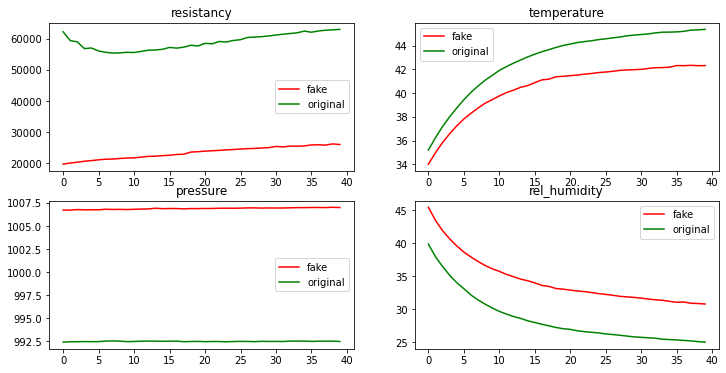

In [193]:
FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x4[i, 0, :][:40], label='fake', color='red')
    ax.plot(x5[i, 0, :][:40], label='original', color='green')
    ax.set_title(FEATURES[i])
    ax.legend()

### Porównanie 4 cech dla perfum ysly

In [195]:
#theone - porównanie cech dla fake i og

fake_ysly = pd.read_csv('fake_ysly_sam.csv')
fake_ysly = fake_ysly.iloc[:, 1:]

n = 98 # stala liczba probek

y6 = np.zeros((4, 10, 98))

for sensorId, df_sensor in fake_ysly.groupby('sensorId'):
    x6 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4,98)
    
        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x6[:, cyclestepId, :] = features[:n]

    y6[:, :, :] = x6

In [197]:
y6.shape, x6.shape
fake_ysly_x = x6
fake_ysly_y = y6

In [199]:
n = 100 # stala liczba probek

og_ysly = pd.read_csv('og_ysly_sam.csv')
og_ysly = og_ysly.iloc[:, 1:]

y7 = np.zeros((4, 10, 100))

for sensorId, df_sensor in og_ysly.groupby('sensorId'):
    x7 = np.zeros((4, 10, n))
    for cyclestepId, df_cycle in df_sensor.groupby('cycle_step_id'):
        features = df_cycle.iloc[:, 3:].to_numpy() 
        features = features.T #(4, 100)

        # print(features.shape)
        if features.shape[1] < n:
            features = np.pad(features, ((0, 0), (0, n - features.shape[1])), mode='constant', constant_values=0, )

        x7[:, cyclestepId, :] = features[:n]

y7[:, :, :] = x7

In [200]:
x7.shape, y7.shape
og_ysly_x = x7
og_ysly_y = y7

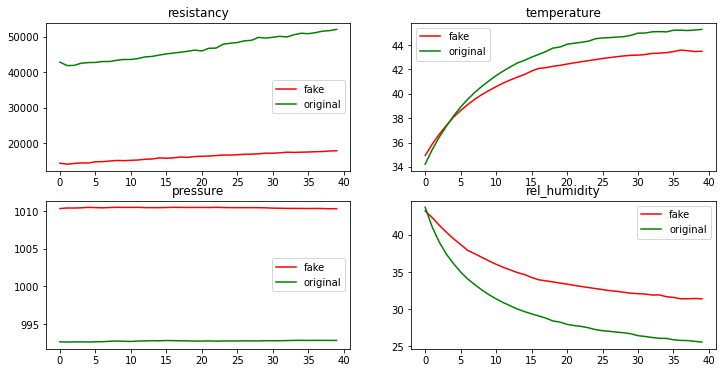

In [201]:
FEATURES = ['resistancy', 'temperature', 'pressure',  'rel_humidity']

fig, axes = plt.subplots(2, 2, figsize = (12, 6))

axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(x6[i, 0, :][:40], label='fake', color='red')
    ax.plot(x7[i, 0, :][:40], label='original', color='green')
    ax.set_title(FEATURES[i])
    ax.legend()

##### Podsumowanie

Podsumowując tę część badania - widoczne są znaczące różnice w odczytach rezystancji (cechy docelowej) pomiędzy perfumami oryginalnymi a ich podróbkami z większymi wartościami dla oryginałów. Dla perfum *euphoria* jednak wyższa wartość rezystancji jest dla fałszywki niż dla oryginału.